In [1]:
import pandas as pd
import pycaret

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
# Check for duplicates
print("Duplicate rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])

print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing values:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

if missing_values.sum() > 0:
    print("\nColumns with missing values:")
    for col in missing_values[missing_values > 0].index:
        print(f"  {col}: {missing_values[col]} ({(missing_values[col] / len(df)) * 100:.2f}%)")


Duplicate rows:
Number of duplicate rows: 0


Missing values:
Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

Total missing values: 0
Percentage of missing values: 0.00%


In [5]:
# Check data types and unique values for object columns
print("Data types:")
print(df.dtypes)

print("\n" + "="*50 + "\n")

# For object columns, print unique values
object_columns = df.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print("Unique values for object columns:")
    for col in object_columns:
        unique_vals = df[col].unique()
        print(f"\n{col}:")
        print(f"  Number of unique values: {len(unique_vals)}")
        print(f"  Unique values: {unique_vals}")
else:
    print("No object columns found in the dataset.")


Data types:
Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object


Unique values for object columns:

Attrition:
  Number of unique values: 2
  Unique values: ['Yes' 'No']

Department:
  Number of unique values: 3
  Unique values: ['Sales' 'Research & Development' 'Human Resources']

EducationField:
  Number of unique values: 6
  Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

MaritalStatus:
  Number of unique values: 3
  Unique values: ['Single' 'Married' 'Divorced']


In [6]:
# Create mappings for object columns and convert to int64
print("Creating mappings for object columns:")

# Attrition mapping
attrition_mapping = {'No': 0, 'Yes': 1}
df['Attrition'] = df['Attrition'].map(attrition_mapping).astype('int64')
print(f"Attrition mapping: {attrition_mapping}")

# Department mapping
department_mapping = {
    'Research & Development': 0, 
    'Sales': 1, 
    'Human Resources': 2
}
df['Department'] = df['Department'].map(department_mapping).astype('int64')
print(f"Department mapping: {department_mapping}")

# EducationField mapping
education_field_mapping = {
    'Life Sciences': 0,
    'Other': 1,
    'Medical': 2,
    'Marketing': 3,
    'Technical Degree': 4,
    'Human Resources': 5
}
df['EducationField'] = df['EducationField'].map(education_field_mapping).astype('int64')
print(f"EducationField mapping: {education_field_mapping}")

# MaritalStatus mapping
marital_status_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping).astype('int64')
print(f"MaritalStatus mapping: {marital_status_mapping}")

print("\n" + "="*50 + "\n")

# Verify the mappings worked
print("Updated data types after mapping:")
print(df.dtypes)

print("\n" + "="*50 + "\n")

# Show first few rows to verify the mappings
print("First 5 rows after mapping:")
print(df.head())




Creating mappings for object columns:
Attrition mapping: {'No': 0, 'Yes': 1}
Department mapping: {'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
EducationField mapping: {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
MaritalStatus mapping: {'Single': 0, 'Married': 1, 'Divorced': 2}


Updated data types after mapping:
Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object


First 5 rows after mapping:
   Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0   41          1           1                 1       

Distribution of Attrition values:
Attrition value counts:
Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition percentages:
Attrition 0 (No): 83.88%
Attrition 1 (Yes): 16.12%


Total dataset size: 1470
Class imbalance ratio: 5.20:1 (No:Yes)


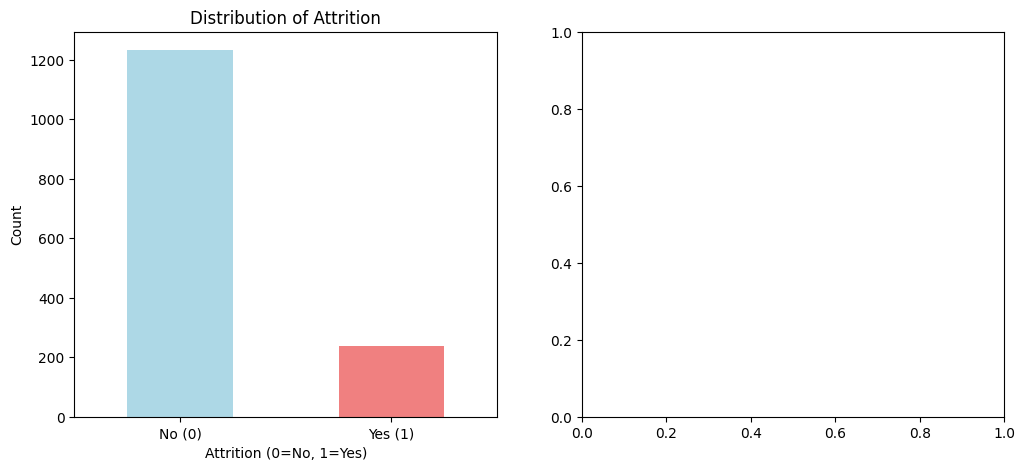

In [7]:
# Analyze the distribution of Attrition values
print("Distribution of Attrition values:")
print("="*50)

# Count the number of each attrition value
attrition_counts = df['Attrition'].value_counts().sort_index()
print("Attrition value counts:")
print(attrition_counts)

print("\nAttrition percentages:")
attrition_percentages = df['Attrition'].value_counts(normalize=True).sort_index() * 100
for value, percentage in attrition_percentages.items():
    label = "No" if value == 0 else "Yes"
    print(f"Attrition {value} ({label}): {percentage:.2f}%")

print("\n" + "="*50 + "\n")

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
attrition_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribution of Attrition')
ax1.set_xlabel('Attrition (0=No, 1=Yes)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)



print(f"Total dataset size: {len(df)}")
print(f"Class imbalance ratio: {attrition_counts[0]/attrition_counts[1]:.2f}:1 (No:Yes)")


Handling Class Imbalance with Resample Method:
Original dataset shape: (1470, 13)
Original class distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

Majority class (No attrition) size: 1233
Minority class (Yes attrition) size: 237

After resampling - Dataset shape: (2466, 13)
After resampling - Class distribution:
Attrition
0    1233
1    1233
Name: count, dtype: int64
Attrition 0 (No): 50.00%
Attrition 1 (Yes): 50.00%

Class balance achieved: 1:1 ratio


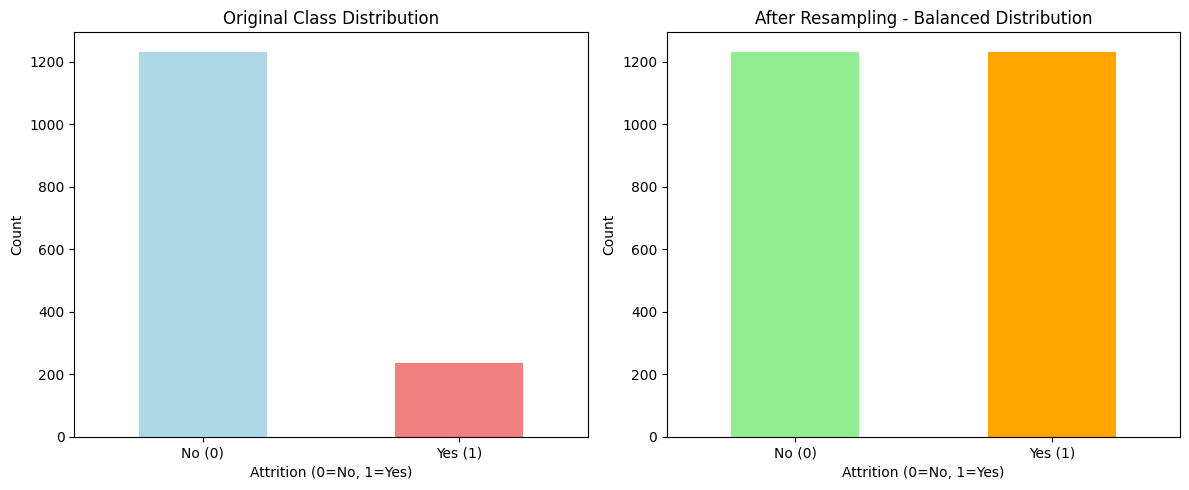

In [8]:
# Handle class imbalance using resample method
from sklearn.utils import resample
import pandas as pd

print("Handling Class Imbalance with Resample Method:")
print("="*50)

print(f"Original dataset shape: {df.shape}")
print(f"Original class distribution:")
print(df['Attrition'].value_counts().sort_index())

# Separate majority and minority classes
df_majority = df[df['Attrition'] == 0]  # No attrition
df_minority = df[df['Attrition'] == 1]  # Yes attrition

print(f"\nMajority class (No attrition) size: {len(df_majority)}")
print(f"Minority class (Yes attrition) size: {len(df_minority)}")

# Upsample minority class to match majority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # sample with replacement
                                n_samples=len(df_majority),    # to match majority class
                                random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(f"\nAfter resampling - Dataset shape: {df_balanced.shape}")
print(f"After resampling - Class distribution:")
print(df_balanced['Attrition'].value_counts().sort_index())

# Calculate the new class distribution percentages
resampled_percentages = df_balanced['Attrition'].value_counts(normalize=True).sort_index() * 100
for value, percentage in resampled_percentages.items():
    label = "No" if value == 0 else "Yes"
    print(f"Attrition {value} ({label}): {percentage:.2f}%")

print(f"\nClass balance achieved: 1:1 ratio")

# Visualize before and after resampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
df['Attrition'].value_counts().sort_index().plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Original Class Distribution')
ax1.set_xlabel('Attrition (0=No, 1=Yes)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)

# After resampling distribution
df_balanced['Attrition'].value_counts().sort_index().plot(kind='bar', ax=ax2, color=['lightgreen', 'orange'])
ax2.set_title('After Resampling - Balanced Distribution')
ax2.set_xlabel('Attrition (0=No, 1=Yes)')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")



Full Correlation Matrix:
                           Age  Attrition  Department  DistanceFromHome  \
Age                      1.000     -0.207      -0.032            -0.015   
Attrition               -0.207      1.000       0.140             0.081   
Department              -0.032      0.140       1.000             0.041   
DistanceFromHome        -0.015      0.081       0.041             1.000   
Education                0.180     -0.033       0.012             0.021   
EducationField          -0.057      0.102       0.349             0.054   
EnvironmentSatisfaction  0.008     -0.140      -0.039             0.005   
JobSatisfaction          0.040     -0.126      -0.040            -0.041   
MaritalStatus            0.144     -0.224       0.010             0.009   
MonthlyIncome            0.511     -0.231       0.076            -0.014   
NumCompaniesWorked       0.316      0.065       0.022            -0.085   
WorkLifeBalance         -0.033     -0.063       0.089            -0.053   


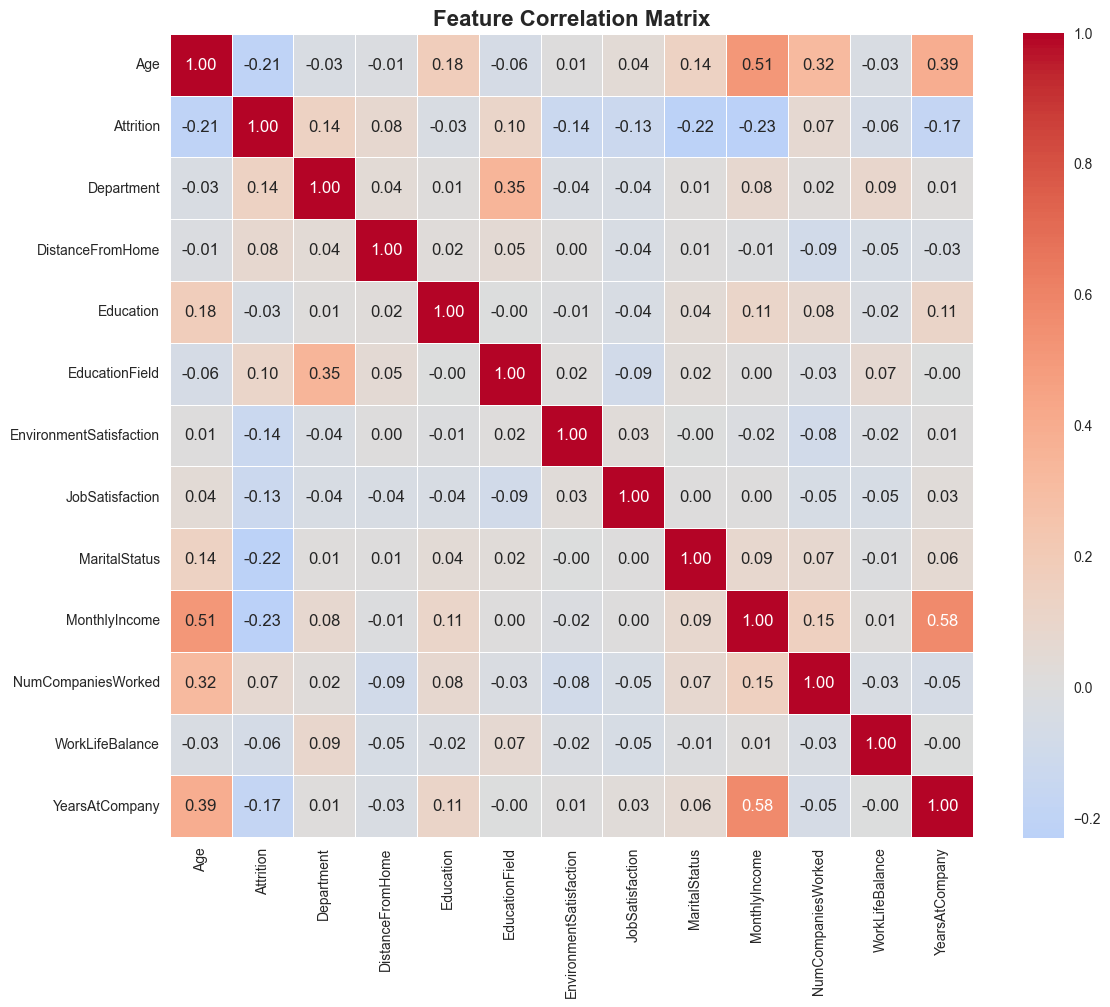

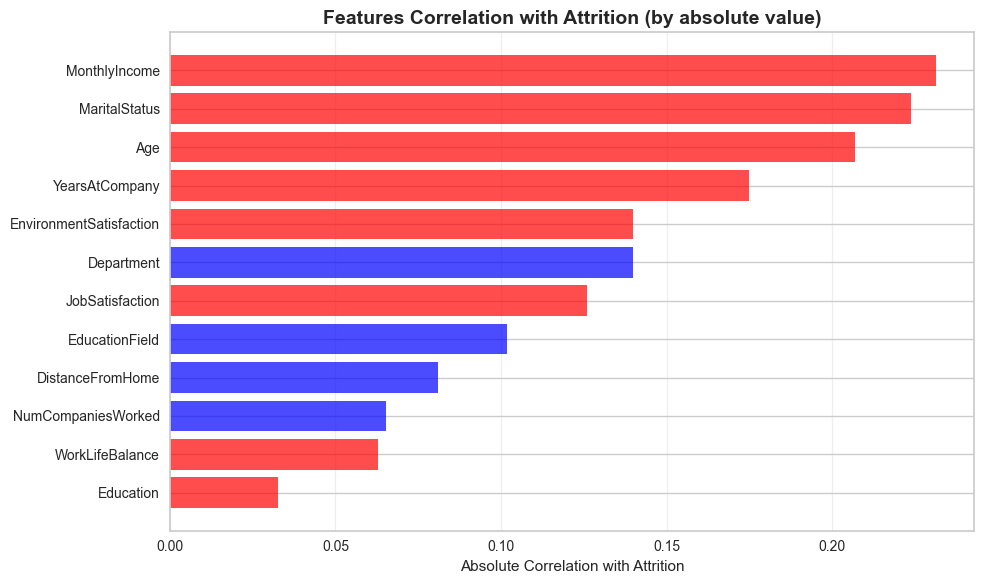

In [13]:
# Calculate correlation matrix
correlation_matrix = df_balanced.corr()

# Display the full correlation matrix
print("Full Correlation Matrix:")
print("="*50)
print(correlation_matrix.round(3))

print("\n" + "="*50 + "\n")

# Focus on correlations with the target variable 'Attrition'
print("Correlations with Attrition (target variable):")
print("="*50)
attrition_correlations = correlation_matrix['Attrition'].sort_values(ascending=False)
print(attrition_correlations.round(3))

print("\n" + "="*50 + "\n")

# Find highly correlated feature pairs (excluding self-correlations)
print("Highly correlated feature pairs (|correlation| > 0.5):")
print("="*50)
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            high_correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': round(corr_value, 3)
            })

if high_correlations:
    for pair in high_correlations:
        print(f"{pair['Feature 1']} - {pair['Feature 2']}: {pair['Correlation']}")
else:
    print("No feature pairs with correlation > 0.5 found")

print("\n" + "="*50 + "\n")

# Visualize correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            square=True,
            linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Create a bar plot for correlations with Attrition
plt.figure(figsize=(10, 6))
attrition_corr_abs = attrition_correlations.drop('Attrition').abs().sort_values(ascending=True)
colors = ['red' if x < 0 else 'blue' for x in attrition_correlations.drop('Attrition')[attrition_corr_abs.index]]
plt.barh(range(len(attrition_corr_abs)), attrition_corr_abs.values, color=colors, alpha=0.7)
plt.yticks(range(len(attrition_corr_abs)), attrition_corr_abs.index)
plt.xlabel('Absolute Correlation with Attrition')
plt.title('Features Correlation with Attrition (by absolute value)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
# Create feature matrix X with the best 3 features and target variable y
X = df_balanced[['MaritalStatus', 'MonthlyIncome', 'Age']]
y = df_balanced['Attrition']

print("Feature matrix X shape:", X.shape)
print("Target variable y shape:", y.shape)
print("\nFirst 5 rows of features:")
print(X.head())
print("\nTarget variable distribution:")
print(y.value_counts())


Feature matrix X shape: (2466, 3)
Target variable y shape: (2466,)

First 5 rows of features:
   MaritalStatus  MonthlyIncome  Age
1              1           5130   49
3              1           2909   33
4              1           3468   27
5              0           3068   32
6              1           2670   59

Target variable distribution:
Attrition
0    1233
1    1233
Name: count, dtype: int64


In [19]:
# Train-test split with 70-30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:")
print(f"Class 0: {sum(y_train == 0)}, Class 1: {sum(y_train == 1)}")
print("Test target distribution:")
print(f"Class 0: {sum(y_test == 0)}, Class 1: {sum(y_test == 1)}")

# Use PyCaret for automated model selection
import pycaret
from pycaret.classification import *

# Create a combined dataset for PyCaret (it needs features and target together)
train_data = X_train.copy()
train_data['Attrition'] = y_train

# Setup PyCaret classification environment
clf = setup(
    data=train_data,
    target='Attrition',
    session_id=123,
    train_size=0.8,
    index=False  # Reset index to RangeIndex to avoid duplicate indices error
)

# Compare multiple models to find the best one
best_models = compare_models(
    include=['lr', 'rf', 'ada', 'gbc', 'xgboost', 'lightgbm', 'dt', 'nb', 'svm'],
    sort='Accuracy',
    n_select=5  # Select top 5 models
)

print("\nTop 5 models comparison completed!")


Training set shape: (1726, 3)
Test set shape: (740, 3)
Training target distribution:
Class 0: 863, Class 1: 863
Test target distribution:
Class 0: 370, Class 1: 370


,Description,Value
0,Session id,123
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(4824, 4)"
4,Transformed data shape,"(4824, 4)"
5,Transformed train set shape,"(3859, 4)"
6,Transformed test set shape,"(965, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9570,0.8871,0.9959,0.9538,0.9744,0.8404,0.8484,0.0180
rf,Random Forest Classifier,0.9531,0.9924,0.9956,0.9498,0.9721,0.8247,0.8343,0.1300
xgboost,Extreme Gradient Boosting,0.9425,0.9428,0.9953,0.9385,0.9660,0.7795,0.7946,0.0410
lightgbm,Light Gradient Boosting Machine,0.9352,0.9486,0.9927,0.9328,0.9618,0.7501,0.7664,0.2770
gbc,Gradient Boosting Classifier,0.8826,0.8752,0.9946,0.8786,0.9330,0.4737,0.5419,0.0860
ada,Ada Boost Classifier,0.8349,0.7926,0.9763,0.8463,0.9067,0.2227,0.2801,0.0590
lr,Logistic Regression,0.8196,0.7059,0.9858,0.8276,0.8998,0.0637,0.1103,0.0260
nb,Naive Bayes,0.8038,0.6998,0.9419,0.8390,0.8874,0.1423,0.1594,0.0200
svm,SVM - Linear Kernel,0.5143,0.5144,0.5098,0.6686,0.5071,0.0253,0.0364,0.0220



Top 5 models comparison completed!


In [20]:
# Create and finalize the best model (Decision Tree)
dt_model = create_model('dt')

# Finalize the model (trains on entire dataset)
final_dt_model = finalize_model(dt_model)

# Save the model as a pickle file
import pickle

with open('decision_tree_attrition_model.pkl', 'wb') as f:
    pickle.dump(final_dt_model, f)

print("Decision Tree model has been saved as 'decision_tree_attrition_model.pkl'")

# Display model performance
evaluate_model(dt_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9534,0.8809,0.9937,0.9517,0.9722,0.8275,0.8350
1,0.9689,0.9187,0.9968,0.9664,0.9814,0.8878,0.8917
2,0.9585,0.8954,0.9937,0.9574,0.9752,0.8485,0.8540
3,0.9378,0.8374,0.9937,0.9347,0.9633,0.7612,0.7767
4,0.9689,0.9130,1.0000,0.9635,0.9814,0.8864,0.8922
5,0.9560,0.8825,0.9968,0.9518,0.9738,0.8361,0.8449
6,0.9456,0.8705,0.9874,0.9485,0.9675,0.8000,0.8062
7,0.9663,0.9058,1.0000,0.9606,0.9799,0.8762,0.8830
8,0.9560,0.8825,0.9968,0.9518,0.9738,0.8361,0.8449


Decision Tree model has been saved as 'decision_tree_attrition_model.pkl'


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…